In [1]:
import pylab as plt
import numpy as np
import pandas as pdimport proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import re
import sys
import glob
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.
import matplotlib.pyplot as plt
import random
try:
    import cPickle as pickle
except ImportError:
    import pickle

In [2]:
CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

energies=[100,250,500,750,1000,1500,2000,3000,4000,5000,6000,7500,8500,10000,11000,12500,15000,20000,25000]
GeV=1000

NumToRun=1000

AreaOfNextNEW=np.pi*(45/2)**2*66 #cm^2 but these dimensions need double checked

In [ ]:
#to open files in neutrinos

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    data = list(f[a_group_key])

In [9]:
#MCeQ outputs with Phi
r=0

for files in glob.glob('/Users/rogerslc/Documents/MuFluxPred/Phis/Muons*degrees.h5'):
    #print (files,re.search('Muons(.*)degrees', files))
    run=re.search('Muons(.*)degrees', files)
    ths=int(run.group(1))
    if r==0:
        mussimData=pd.read_hdf(files)
        mussimData['theta']=    ths
        r+=1
    else:
        df=pd.read_hdf(files)
        df['theta']=ths
        mussimData=mussimData.append(df, ignore_index=True)
        
mussimData['altitude']=mussimData.altitude*10**-2    
alpharange=mussimData.theta.unique()
alpharange.sort()
betarange=mussimData.phis.unique()
betarange.sort()
print(alpharange)
mussimData=mussimData.rename(columns={"theta": "alpha", "phis":  "beta"})

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [11]:
energiesrange=mussimData.Energies.unique()
energiesrange.sort
len(energiesrange)

121

In [65]:
E=energiesrange[50]
inteAs=[]
inteBs=[]
inteflux=[]

for A in alpharange[::2]:
    print(A)
    for B in betarange[::15]:
        alp=np.deg2rad(A)
        bet=np.deg2rad(B)
        inteAs.append(np.cos(alp))
        inteBs.append(bet)
        
        FLUX=mussimData[(mussimData.alpha==A)&(mussimData.beta==B)&(mussimData.Energies==E)].MuFLux.iloc[0]
        inteflux.append(FLUX)
        

inteflux = np.array(inteflux)
inteflux=inteflux.reshape(len(np.unique(inteAs)), len(np.unique(inteBs)))


        

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88


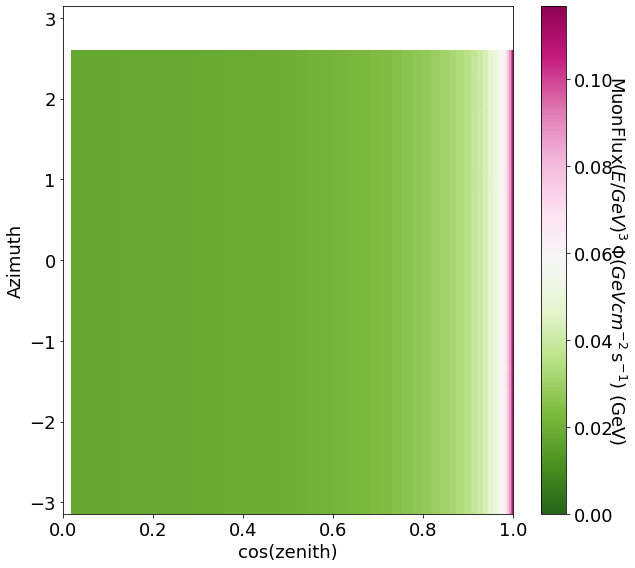

In [73]:


fig, (ax) = plt.subplots(1, 1,figsize=(9,8))

cmap = plt.get_cmap('PiYG')
c=ax.pcolormesh(np.unique(inteAs),np.unique(inteBs),np.transpose(inteflux),cmap=cmap.reversed(),shading='auto',vmin=0)



clb=fig.colorbar(c, ax=ax)
clb.ax.tick_params(labelsize=18) 

clb.ax.set_ylabel('MuonFlux'+ r'$(E/ {GeV})^3\,\Phi (GeV cm^{-2}\,$s$^{-1}$) (GeV)', rotation=270,fontsize=18, labelpad=15)

plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 

plt.ylim(-np.pi,np.pi)
plt.xlim(0,1)

plt.ylabel('Azimuth',fontsize=18)
plt.xlabel('cos(zenith)',fontsize=18)
plt.tight_layout()
#plt.savefig('efficiency.png',dpi=250,bbox_inches='tight')
plt.show()

starting on energy 0


No handles with labels found to put in legend.


starting on energy 1


No handles with labels found to put in legend.


starting on energy 2


No handles with labels found to put in legend.


starting on energy 3


No handles with labels found to put in legend.


starting on energy 4


No handles with labels found to put in legend.


starting on energy 5


No handles with labels found to put in legend.


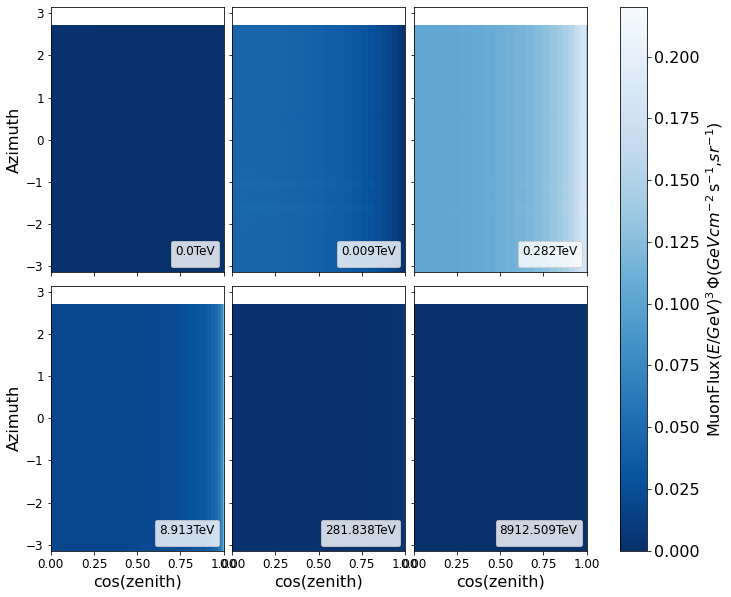

In [105]:
energies=energiesrange[5:90:15]
locs=range(0,6)
a=0

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,10), sharex=True, sharey=True)
cmap = plt.get_cmap('Blues')
for ax in axes.flat:
    
    print("starting on energy",a)
    LOC=locs[a]
    


    E=energies[LOC]

    inteAs=[]
    inteBs=[]
    inteflux=[]

    for A in alpharange[::4]:
        #print(A)
        for B in betarange[::25]:
            alp=np.deg2rad(A)
            bet=np.deg2rad(B)
            inteAs.append(np.cos(alp))
            inteBs.append(bet)

            FLUX=mussimData[(mussimData.alpha==A)&(mussimData.beta==B)&(mussimData.Energies==E)].MuFLux.iloc[0]
            inteflux.append(FLUX)


    inteflux = np.array(inteflux)
    inteflux=inteflux.reshape(len(np.unique(inteAs)), len(np.unique(inteBs)))


    im=ax.pcolormesh(np.unique(inteAs),np.unique(inteBs),np.transpose(inteflux),cmap=cmap.reversed(),shading='auto',vmin=0,vmax=.22)



    #clb=fig.colorbar(c, ax=ax)
    #clb.ax.tick_params(labelsize=18) 

    #clb.ax.set_ylabel('MuonFlux'+ r'$(E/ {GeV})^3\,\Phi (GeV cm^{-2}\,$s$^{-1}$) (GeV)', rotation=270,fontsize=18, labelpad=15)

    
    ax.set_ylim(-np.pi,np.pi)
    ax.set_xlim(0,1)
    ax.tick_params(axis='both', which='major', labelsize=12)
    

    ax.legend(loc='lower right',title=str(E*10**-3)+'TeV',title_fontsize=12)

    if (LOC>2):
        ax.set_xlabel("cos(zenith)",fontsize=16)
    if (LOC==0) or (LOC==3):        
        ax.set_ylabel("Azimuth",fontsize=16)


    a+=1

fig.subplots_adjust(wspace=.05, hspace=.05)

cbar=fig.colorbar(im, ax=axes.ravel().tolist())
#cbar.set_ticks(np.arange(0, 1, 0.2))
cbar.set_label('MuonFlux'+ r'$(E/ {GeV})^3\,\Phi (GeV cm^{-2}\,$s$^{-1}$,$sr^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)
#fig.clim(0,1)


#fig.savefig("/Users/rogerslc/PROPOSAL/PROPOSAL/SimulatedPercents.png",dpi=250,bbox_inches='tight')

#plt.show()






In [70]:
energies=energiesrange[5:90:15]
locs=range(0,6)
a=0

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,10), sharex=True, sharey=True)
cmap = plt.get_cmap('Blues')
for ax in axes.flat:
    
    print("starting on energy",a)
    LOC=locs[a]
    


    E=energies[LOC]

    inteAs=[]
    inteBs=[]
    inteflux=[]

    for A in alpharange[::4]:
        #print(A)
        for B in betarange[::25]:
            alp=np.deg2rad(A)
            bet=np.deg2rad(B)
            inteAs.append(np.cos(alp))
            inteBs.append(bet)

            FLUX=mussimData[(mussimData.alpha==A)&(mussimData.beta==B)&(mussimData.Energies==E)].MuFLux.iloc[0]
            inteflux.append(FLUX)


    inteflux = np.array(inteflux)
    inteflux=inteflux.reshape(len(np.unique(inteAs)), len(np.unique(inteBs)))




    a+=1

    df=pd.DataFrame(inteAs, columns = ['Alpha'])
    df['Beta']=inteBs
    df['Muflux']=inteflux

    fluxarray=np.array(df.Muflux)
    fluxarray = fluxarray.reshape(len(df.Alpha.unique()), len(df.Beta.unique()))
    FluxMuons=scipy.interpolate.RectBivariateSpline(np.unique(df.Alpha),np.unique(df.Beta),fluxarray,s=0,kx=3, ky=3)

    with open('/Users/rogerslc/MCeQ/MCeQ_Muons_interpolator'+str(np.round((E*10**-3),4))+'TeV.pkl', 'wb') as f:
        pickle.dump(FluxMuons, f)
        


6